# Importando as bibliotecas necessárias
Importando as bibliotecas necessárias, incluindo pandas, matplotlib, seaborn e numpy.

In [1]:
import pandas as pd
import pdfplumber
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Carregar o Dataset

Para carregar o dataset, utilizamos a biblioteca `pdfplumber` para extrair tabelas de um arquivo PDF. Em seguida, os dados extraídos são convertidos em um DataFrame do pandas, onde realizamos algumas limpezas, como remover linhas nulas e redefinir os índices. Por fim, exibimos algumas informações sobre o DataFrame, como o número de registros, número de variáveis, valores nulos e tipos de dados.

In [2]:
pdf_path = "Matrículas2025.pdf"

data = []
with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        table = page.extract_table()
        if table:
            data.extend(table)  

df = pd.DataFrame(data, columns=["Curso", "Candidato", "Tipo de Vaga"])
df = df.iloc[1:].reset_index(drop=True)
df = df.dropna().reset_index(drop=True)

num_linhas, num_colunas = df.shape
print(f"Número total de registros (linhas): {num_linhas}")
print(f"Número total de variáveis (colunas): {num_colunas}")
print("\n")

print("Valores nulos:")
print(df.isnull().sum())
print("\n")

print("Tipos de dados:")
print(df.dtypes)
print("\n")

df.head()

Número total de registros (linhas): 1643
Número total de variáveis (colunas): 3


Valores nulos:
Curso           0
Candidato       0
Tipo de Vaga    0
dtype: int64


Tipos de dados:
Curso           object
Candidato       object
Tipo de Vaga    object
dtype: object




,Curso,Candidato,Tipo de Vaga
0,AGRONOMIA - BACHARELADO - INTEGRAL,ANA JULIA LUZ DA SILVA,LB_PPI
1,AGRONOMIA - BACHARELADO - INTEGRAL,ANDRESSA LORENZETTI GOLDONI,A0
2,AGRONOMIA - BACHARELADO - INTEGRAL,BRUNO SANTOS DE SOUSA,A0
3,AGRONOMIA - BACHARELADO - INTEGRAL,CARLOS EDUARDO TEIXEIRA GOMES,LI_PPI
4,AGRONOMIA - BACHARELADO - INTEGRAL,DAYARA ADRIELLY SOARES SILVA,A0


## Taxa de Matrícula por Curso
 Comparar o número de aprovados e matriculados por curso em um conjunto de dados. Primeiro, ele filtra os candidatos aprovados que pertencem às categorias "LB_PPI" e "LI_PPI". Em seguida, calcula a quantidade total de matriculados por curso e a quantidade de aprovados para esses cursos, garantindo que todos os cursos presentes em matriculados estejam representados em aprovados, mesmo que tenham zero aprovados.

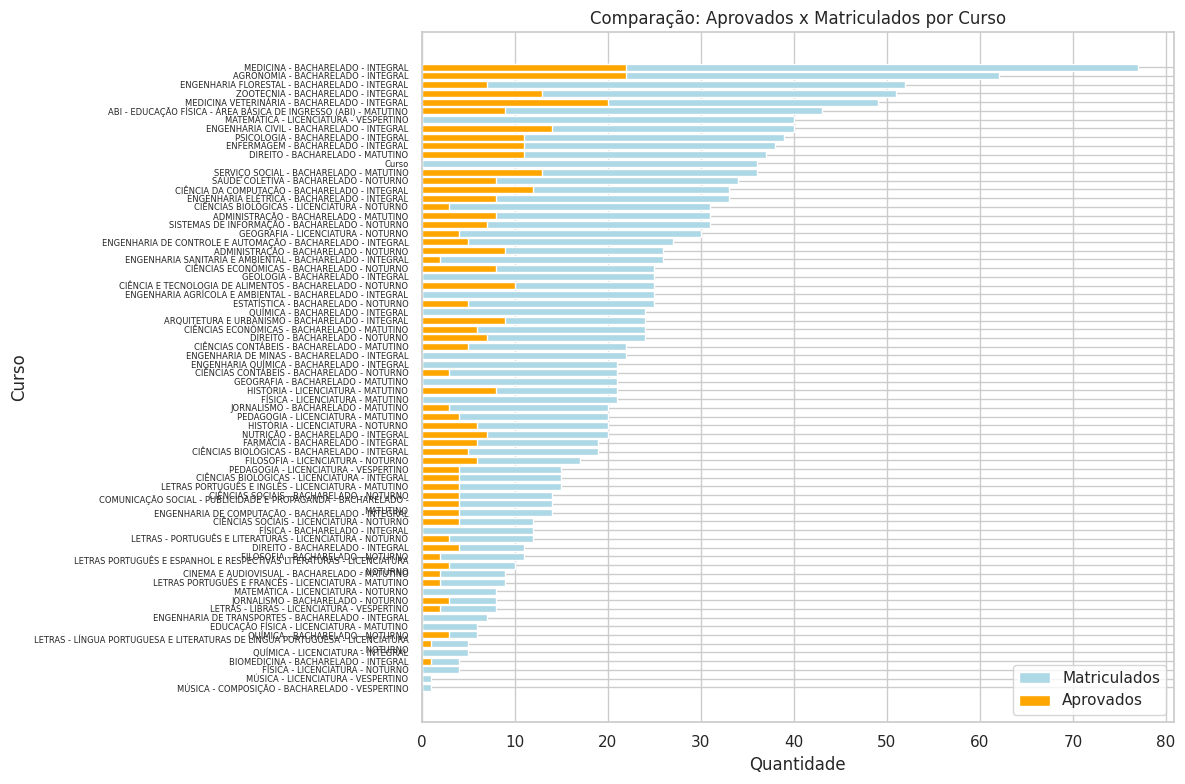

In [ ]:
aprovados_mask = df["Tipo de Vaga"].isin(["LB_PPI", "LI_PPI"])
matriculados = df.groupby("Curso").size()
aprovados = df[aprovados_mask].groupby("Curso").size().reindex(matriculados.index, fill_value=0)

matriculados_sorted = matriculados.sort_values(ascending=True)
aprovados_sorted = aprovados.reindex(matriculados_sorted.index)

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(matriculados_sorted.index, matriculados_sorted, label="Matriculados", color="lightblue")
ax.barh(aprovados_sorted.index, aprovados_sorted, label="Aprovados", color="orange")

ax.set_xlabel("Quantidade")
ax.set_ylabel("Curso")
ax.set_title("Comparação: Aprovados x Matriculados por Curso")
ax.tick_params(axis="y", labelsize=6)
ax.legend()

plt.tight_layout()
plt.show()

## Taxa de Matrícula por Modalidade de Ingresso
Verificar se há diferença na taxa de matrícula entre modalidades como SISU, cotas, vestibular próprio etc.

O código agrupa os dados do DataFrame pela coluna "Tipo de Vaga" utilizando o método groupby, e em seguida calcula a quantidade de ocorrências em cada grupo com o método size(). Isso resulta em uma Série onde cada índice representa uma modalidade de ingresso e seu valor, a quantidade de matrículas.

Posteriormente, cria uma figura do matplotlib com tamanho 10x6 e plota um gráfico de barras a partir da Série gerada. O gráfico utiliza a cor "skyblue" para as barras e "black" para as bordas, facilitando a visualização das diferenças entre as modalidades.

O título, os rótulos dos eixos x e y são definidos para deixar claro que o gráfico mostra a "Taxa de Matrículas por Modalidade de Ingresso". O uso do tight_layout() garante que os elementos do gráfico não se sobreponham, e plt.show() exibe o resultado.

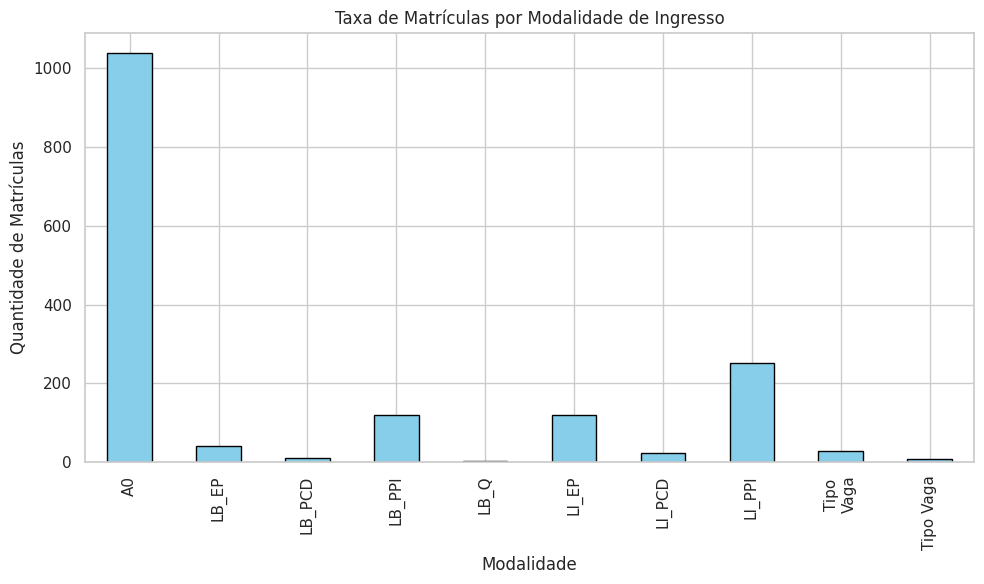

In [ ]:
matriculas_modalidade = df.groupby("Tipo de Vaga").size()

plt.figure(figsize=(10, 6))
matriculas_modalidade.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Taxa de Matrículas por Modalidade de Ingresso")
plt.xlabel("Modalidade")
plt.ylabel("Quantidade de Matrículas")
plt.tight_layout()
plt.show()

## Taxa de Matrícula por Turno do Curso
Os cursos noturnos apresentam menor taxa de matrícula em comparação com os cursos diurnos?

O código realiza os seguintes passos:

1. Usa o método str.contains para filtrar, a partir da série "matriculados", os cursos que são noturnos e matutinos (independente de caixa alta ou baixa).
2. Calcula o total de matrículas para cursos noturnos e matutinos usando a função sum() e, separadamente, calcula a média de matrículas por curso em cada turno com mean().
3. Exibe os totais e as médias no console e, com base na comparação das médias, imprime uma conclusão indicando se os cursos noturnos têm uma taxa de matrícula menor que os cursos matutinos.
4. Cria um DataFrame para agrupar os dados dos dois turnos, combinando os valores dos cursos noturnos e matutinos com seus respectivos rótulos.
5. Utiliza o seaborn para construir um boxplot que exibe a distribuição do número de matrículas entre os turnos, facilitando a visualização e comparação dos dados.

Esta análise documenta o fluxo de trabalho, os cálculos estatísticos realizados e a estratégia de visualização aplicada para comparar os turnos.

Total de matrículas em cursos NOTURNOS: 399
Total de matrículas em cursos MATUTINOS: 349
Média de matrículas por curso (noturno): 18.136363636363637
Média de matrículas por curso (matutino): 21.8125

Conclusão: Os cursos noturnos apresentam uma taxa de matrícula menor que os cursos matutinos.


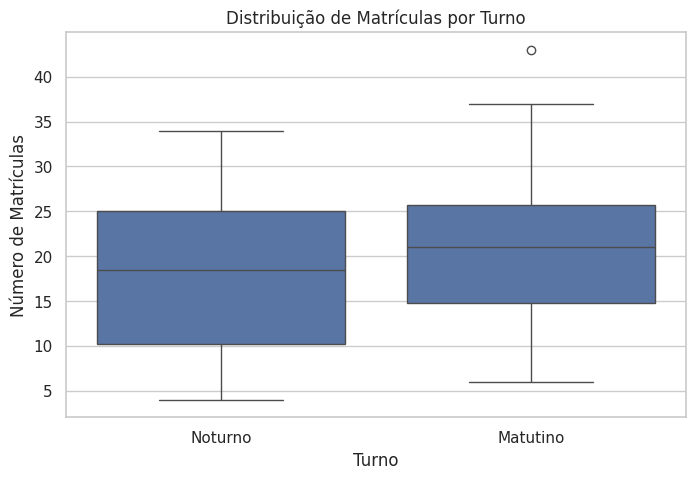

In [32]:
matriculados_noturno = matriculados[matriculados.index.str.contains("NOTURNO", case=False)]
matriculados_matutino = matriculados[matriculados.index.str.contains("MATUTINO", case=False)]

total_noturno = matriculados_noturno.sum()
total_matutino = matriculados_matutino.sum()
media_noturno = matriculados_noturno.mean()
media_matutino = matriculados_matutino.mean()

print("Total de matrículas em cursos NOTURNOS:", total_noturno)
print("Total de matrículas em cursos MATUTINOS:", total_matutino)
print("Média de matrículas por curso (noturno):", media_noturno)
print("Média de matrículas por curso (matutino):", media_matutino)

if media_noturno < media_matutino:
  print("\nConclusão: Os cursos noturnos apresentam uma taxa de matrícula menor que os cursos matutinos.")
else:
  print("\nConclusão: Os cursos noturnos não apresentam uma taxa de matrícula menor que os cursos matutinos.")

df_boxplot = pd.DataFrame({
  "Turno": ["Noturno"] * len(matriculados_noturno) + ["Matutino"] * len(matriculados_matutino),
  "Matrículas": np.concatenate([matriculados_noturno.values, matriculados_matutino.values])
})

plt.figure(figsize=(8, 5))
sns.boxplot(x="Turno", y="Matrículas", data=df_boxplot)

plt.title("Distribuição de Matrículas por Turno")
plt.ylabel("Número de Matrículas")
plt.xlabel("Turno")

plt.show()

## Taxa de Matrícula por Tipo de Formação 
Bacharelados e licenciaturas possuem diferenças na taxa de matrícula?

O código realiza as seguintes etapas:

- Filtra o DataFrame original em dois subconjuntos: um com cursos que contêm "BACHARELADO" e outro com cursos que contêm "LICENCIATURA" (a verificação é case insensitive).
- Para cada subconjunto, o agrupamento por curso é feito para contar o número de matrículas em cada curso.
- Calcula-se o total de matrículas (usando sum) e a média de matrículas por curso (usando mean) para os dois tipos de formação.
- São impressos os valores totais e as médias.
- Finalmente, o código gera uma figura com dois eixos (subplots):
  • O primeiro eixo exibe um gráfico de barras comparando o total de matrículas entre Bacharelado e Licenciatura.
  • O segundo eixo mostra um gráfico de barras comparando a média de matrículas por curso para as duas formações.
- O uso de plt.tight_layout() garante que os elementos gráficos não se sobreponham, e plt.show() exibe os gráficos.

Total de matrículas - Bacharelado: 1239
Total de matrículas - Licenciatura: 325
Média de matrículas por curso - Bacharelado: 25.8125
Média de matrículas por curso - Licenciatura: 14.772727272727273


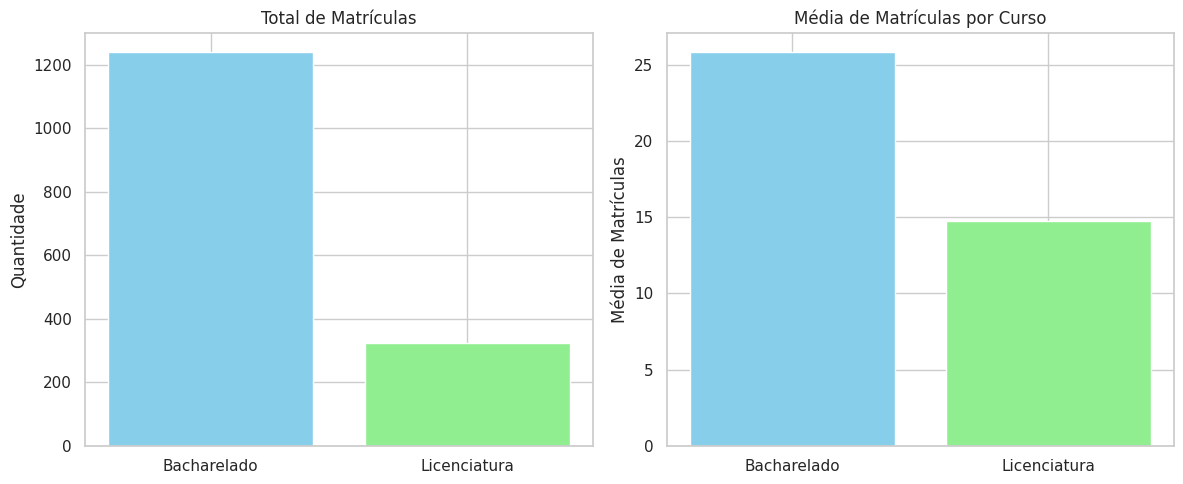

In [ ]:
df_bach = df[df['Curso'].str.contains("BACHARELADO", case=False)]
df_lic = df[df['Curso'].str.contains("LICENCIATURA", case=False)]

matriculados_bach = df_bach.groupby("Curso").size()
matriculados_lic = df_lic.groupby("Curso").size()

total_bach = matriculados_bach.sum()
total_lic = matriculados_lic.sum()

mean_bach = matriculados_bach.mean()
mean_lic = matriculados_lic.mean()

print("Total de matrículas - Bacharelado:", total_bach)
print("Total de matrículas - Licenciatura:", total_lic)
print("Média de matrículas por curso - Bacharelado:", mean_bach)
print("Média de matrículas por curso - Licenciatura:", mean_lic)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(["Bacharelado", "Licenciatura"], [total_bach, total_lic], color=["skyblue", "lightgreen"])
ax[0].set_title("Total de Matrículas")
ax[0].set_ylabel("Quantidade")

ax[1].bar(["Bacharelado", "Licenciatura"], [mean_bach, mean_lic], color=["skyblue", "lightgreen"])
ax[1].set_title("Média de Matrículas por Curso")
ax[1].set_ylabel("Média de Matrículas")

plt.tight_layout()
plt.show()

## Diferença na Taxa de Matrícula entre Cotistas e Não Cotistas  
Ao analisar os dados, observa-se que o número de alunos não cotistas (1037) é consideravelmente maior que o de cotistas (606). Essa diferença indica que, embora as políticas de ação afirmativa assegurem acesso a um grupo específico, a parcela dos não cotistas permanece dominante na distribuição geral das matrículas. Essa comparação pode auxiliar na discussão sobre a efetividade e o alcance dessas políticas, bem como na avaliação de possíveis ajustes para garantir uma representação equilibrada e atender melhor à diversidade dos candidatos.


/tmp/ipykernel_2031/697021223.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="pastel")


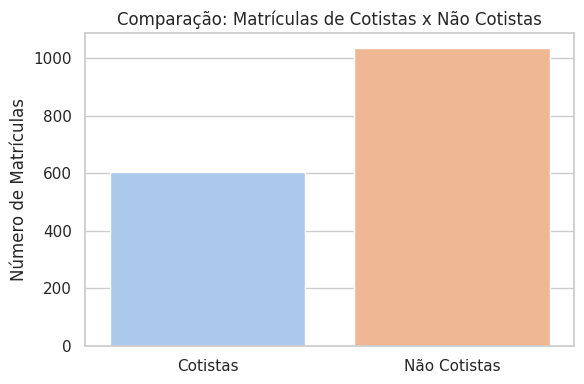

Número de estudantes cotistas: 606
Número de estudantes não cotistas: 1037


In [ ]:
cotistas_df = df[df["Tipo de Vaga"] != "A0"]
nao_cotistas_df = df[df["Tipo de Vaga"] == "A0"]

total_cotistas = cotistas_df.shape[0]
total_nao_cotistas = nao_cotistas_df.shape[0]

labels = ["Cotistas", "Não Cotistas"]
counts = [total_cotistas, total_nao_cotistas]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=counts, palette="pastel")
plt.title("Comparação: Matrículas de Cotistas x Não Cotistas")
plt.ylabel("Número de Matrículas")
plt.tight_layout()
plt.show()

print("Número de estudantes cotistas:", total_cotistas)
print("Número de estudantes não cotistas:", total_nao_cotistas)